# CSE-221710309028-KONDA SAI MEGHANA

Take any dataset of your choice from Kaggle or UCI and do the analysis on the data

-Load the dataset in a proper structure
-Get the number of rows and columns from the dataset
-Check how many categorical and numerical columns are there

Categorical - object type

Numerical - int,float

Boolean - bool

-Get the basic descriptive information from the dataset
-Get the frequency of the categories in all the columns of the dataset
-Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.
-Impute the missing values based on numerical and categorical
-Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots -generated
-Select any column as output from the dataset and plot the output column with some of the input columns, which are suitable from your data columns
-Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [20]:
data = pd.read_csv("weather_data.csv")
data

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [26]:
data = data.replace({'temperature':-99999,'windspeed':-99999,'event':'0'},np.nan)
data

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [33]:
# Get the number of rows and columns from the dataset
print(data.shape[0])# no. of rows
print(data.shape[1])# no. of columns

7
4


In [34]:
#Check how many categorical and numerical columns are there
print(len(data.select_dtypes(include=['object']).columns)) # no of Categorial columns
print(len(data.select_dtypes(include=['int64','float64']).columns)) # no of Numerical columns

2
2


In [35]:
#Get the basic descriptive information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
day            7 non-null object
temperature    5 non-null float64
windspeed      5 non-null float64
event          5 non-null object
dtypes: float64(2), object(2)
memory usage: 304.0+ bytes


In [36]:
data.describe()

,temperature,windspeed
count,5.00000,5.000000
mean,31.40000,5.400000
std,2.19089,2.073644
min,28.00000,2.000000
25%,31.00000,5.000000
50%,32.00000,6.000000
75%,32.00000,7.000000
max,34.00000,7.000000


In [37]:
# Get the frequency of the categories in all the columns of the dataset
data.day.value_counts()

1/6/2017    2
1/3/2017    1
1/2/2017    1
1/1/2017    1
1/5/2017    1
1/4/2017    1
Name: day, dtype: int64

In [38]:
data.temperature.value_counts()

32.0    2
34.0    1
31.0    1
28.0    1
Name: temperature, dtype: int64

In [39]:
data.windspeed.value_counts()

7.0    2
5.0    1
2.0    1
6.0    1
Name: windspeed, dtype: int64

In [40]:
data.event.value_counts()

Sunny    2
Rain     2
Snow     1
Name: event, dtype: int64

In [41]:
#Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.
df.isnull().sum()

day,temperature,windspeed,event    0
dtype: int64

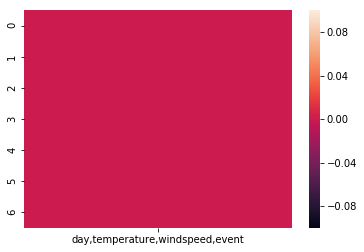

In [42]:
sns.heatmap(df.isna())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020605983CC0>,
      dtype=object)

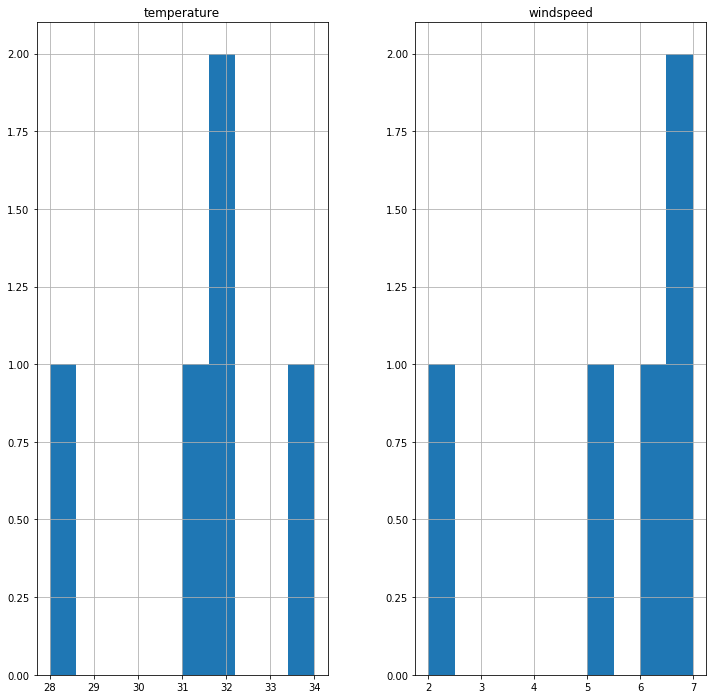

In [48]:
# Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots generated
data.hist(figsize=(12,12))

In [49]:
data.event.value_counts(normalize=True)

Sunny    0.4
Rain     0.4
Snow     0.2
Name: event, dtype: float64

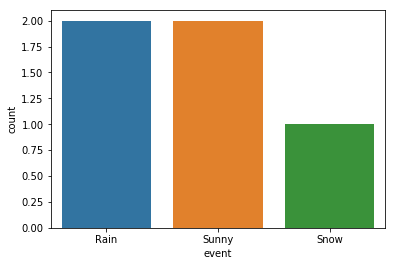

In [50]:
sns.countplot(data['event'])

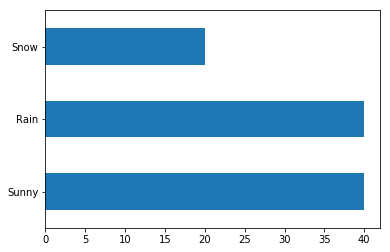

In [51]:
(data.event.value_counts(normalize=True)*100).plot.barh()

In [52]:
# Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn
merge_data=pd.get_dummies(data,columns=['day','temperature','windspeed','event'])
merge_data

,day_1/1/2017,day_1/2/2017,day_1/3/2017,day_1/4/2017,day_1/5/2017,day_1/6/2017,temperature_28.0,temperature_31.0,temperature_32.0,temperature_34.0,windspeed_2.0,windspeed_5.0,windspeed_6.0,windspeed_7.0,event_Rain,event_Snow,event_Sunny
0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # creating an object
merge_data=sc.fit_transform(merge_data)
merge_data

C:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ANACONDA\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 2.44948974, -0.40824829, -0.40824829, -0.40824829, -0.40824829,
        -0.63245553, -0.40824829, -0.40824829,  1.58113883, -0.40824829,
        -0.40824829, -0.40824829,  2.44948974, -0.63245553,  1.58113883,
        -0.40824829, -0.63245553],
       [-0.40824829,  2.44948974, -0.40824829, -0.40824829, -0.40824829,
        -0.63245553, -0.40824829, -0.40824829, -0.63245553, -0.40824829,
        -0.40824829, -0.40824829, -0.40824829,  1.58113883, -0.63245553,
        -0.40824829,  1.58113883],
       [-0.40824829, -0.40824829,  2.44948974, -0.40824829, -0.40824829,
        -0.63245553,  2.44948974, -0.40824829, -0.63245553, -0.40824829,
        -0.40824829, -0.40824829, -0.40824829, -0.63245553, -0.63245553,
         2.44948974, -0.63245553],
       [-0.40824829, -0.40824829, -0.40824829,  2.44948974, -0.40824829,
        -0.63245553, -0.40824829, -0.40824829, -0.63245553, -0.40824829,
        -0.40824829, -0.40824829, -0.40824829,  1.58113883, -0.63245553,
        -0.40824829

In [54]:
merge_data=pd.DataFrame(merge_data)
merge_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.449490,-0.408248,-0.408248,-0.408248,-0.408248,-0.632456,-0.408248,-0.408248,1.581139,-0.408248,-0.408248,-0.408248,2.449490,-0.632456,1.581139,-0.408248,-0.632456
1,-0.408248,2.449490,-0.408248,-0.408248,-0.408248,-0.632456,-0.408248,-0.408248,-0.632456,-0.408248,-0.408248,-0.408248,-0.408248,1.581139,-0.632456,-0.408248,1.581139
2,-0.408248,-0.408248,2.449490,-0.408248,-0.408248,-0.632456,2.449490,-0.408248,-0.632456,-0.408248,-0.408248,-0.408248,-0.408248,-0.632456,-0.632456,2.449490,-0.632456
3,-0.408248,-0.408248,-0.408248,2.449490,-0.408248,-0.632456,-0.408248,-0.408248,-0.632456,-0.408248,-0.408248,-0.408248,-0.408248,1.581139,-0.632456,-0.408248,-0.632456
4,-0.408248,-0.408248,-0.408248,-0.408248,2.449490,-0.632456,-0.408248,-0.408248,1.581139,-0.408248,-0.408248,-0.408248,-0.408248,-0.632456,1.581139,-0.408248,-0.632456
5,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,1.581139,-0.408248,2.449490,-0.632456,-0.408248,2.449490,-0.408248,-0.408248,-0.632456,-0.632456,-0.408248,1.581139
6,-0.408248,-0.408248,-0.408248,-0.408248,-0.408248,1.581139,-0.408248,-0.408248,-0.632456,2.449490,-0.408248,2.449490,-0.408248,-0.632456,-0.632456,-0.408248,-0.632456
